In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import copy

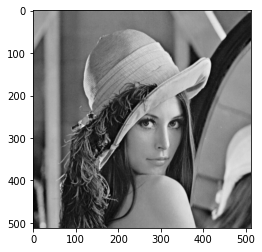

In [2]:
gray_image=cv.imread('lenna.png',0)
plt.imshow(gray_image,cmap='gray')

formula:
H(u,v)=1/(1+([Distance to D0]*Width/([Distance to D0]**2-D0**2))**2n), where D0 is the 截止半徑

In [24]:
def custom_butterworth_low_pass(fft,d0,n_level,bandwidth):
    temp=copy.copy(fft)
    center=(round(temp.shape[0]/2),round(temp.shape[1]/2))
    for u, rows in enumerate(temp):
        for v, cols in enumerate(rows):
            dist=math.sqrt((u-center[0])**2 + (v-center[1])**2)
            h=1/(1+math.pow(dist*bandwidth/(1+math.pow(dist,2)-math.pow(d0,2)),2*n_level))
            temp[u,v]=temp[u,v]*h
    return temp

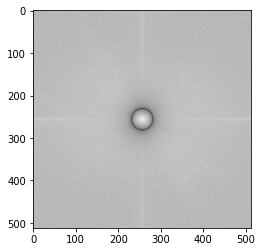

In [25]:
fft=np.fft.fftshift(np.fft.fft2(gray_image))
# Butterworth low pass filter
fft_1=custom_butterworth_low_pass(fft,25,2,100)
fft_2=custom_butterworth_low_pass(fft,50,2,100)
fft_3=custom_butterworth_low_pass(fft,150,2,100)
plt.imshow(np.log(abs(fft_1)),cmap='gray')

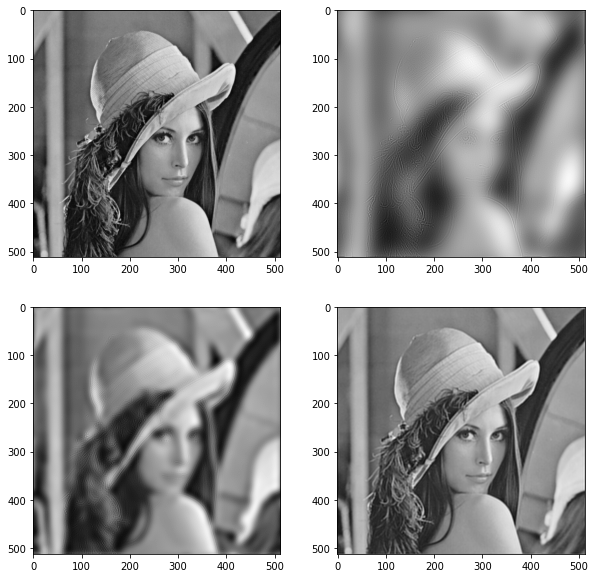

In [26]:
ifft_1=np.fft.ifft2(fft_1)
ifft_2=np.fft.ifft2(fft_2)
ifft_3=np.fft.ifft2(fft_3)

fig,ax=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1),cmap='gray')
plt.subplot(2,2,3)
plt.imshow(abs(ifft_2),cmap='gray')
plt.subplot(2,2,4)
plt.imshow(abs(ifft_3),cmap='gray')

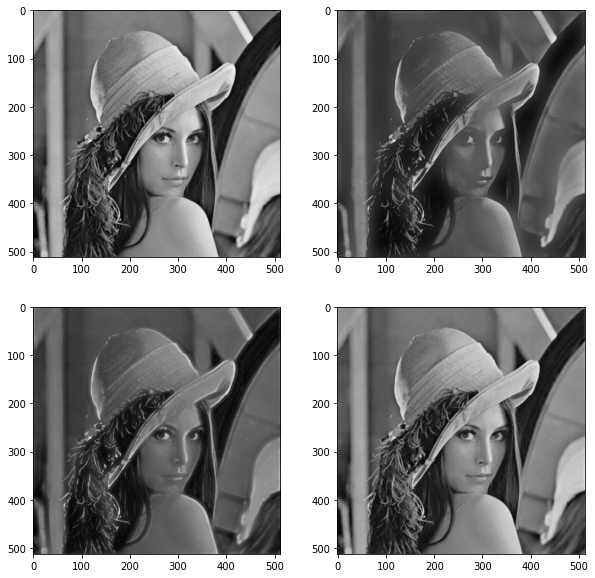

In [23]:
# sharpen the original image by adding the filtered image
fig2,ax2=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1)+gray_image,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(abs(ifft_2)+gray_image,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(abs(ifft_3)+gray_image,cmap='gray')